In [1]:
import sys
import urllib
import zipfile
from os import path

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import plotly.express as px
import seaborn as sns
from skrub import TableReport

# `pandas`

In [2]:
!pwd

/Users/sylvaincom/Documents/GitHub/pyds_lectures/cs_exed/ms_ia_confiance/2024_2025/lectures


In [3]:
df = pd.read_csv("./data/gapminder_gdp_europe.csv", index_col=0)

In [4]:
type(df)

pandas.core.frame.DataFrame

In [5]:
df

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Albania,1601.056136,1942.284244,2312.888958,2760.196931,3313.422188,3533.003910,3630.880722,3738.932735,2497.437901,3193.054604,4604.211737,5937.029526
Austria,6137.076492,8842.598030,10750.721110,12834.602400,16661.625600,19749.422300,21597.083620,23687.826070,27042.018680,29095.920660,32417.607690,36126.492700
Belgium,8343.105127,9714.960623,10991.206760,13149.041190,16672.143560,19117.974480,20979.845890,22525.563080,25575.570690,27561.196630,30485.883750,33692.605080
Bosnia and Herzegovina,973.533195,1353.989176,1709.683679,2172.352423,2860.169750,3528.481305,4126.613157,4314.114757,2546.781445,4766.355904,6018.975239,7446.298803
Bulgaria,2444.286648,3008.670727,4254.337839,5577.002800,6597.494398,7612.240438,8224.191647,8239.854824,6302.623438,5970.388760,7696.777725,10680.792820
Croatia,3119.236520,4338.231617,5477.890018,6960.297861,9164.090127,11305.385170,13221.821840,13822.583940,8447.794873,9875.604515,11628.388950,14619.222720
Czech Republic,6876.140250,8256.343918,10136.867130,11399.444890,13108.453600,14800.160620,15377.228550,16310.443400,14297.021220,16048.514240,17596.210220,22833.308510
Denmark,9692.385245,11099.659350,13583.313510,15937.211230,18866.207210,20422.901500,21688.040480,25116.175810,26406.739850,29804.345670,32166.500060,35278.418740
Finland,6424.519071,7545.415386,9371.842561,10921.636260,14358.875900,15605.422830,18533.157610,21141.012230,20647.164990,23723.950200,28204.590570,33207.084400


In [6]:
df.head()

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Albania,1601.056136,1942.284244,2312.888958,2760.196931,3313.422188,3533.003910,3630.880722,3738.932735,2497.437901,3193.054604,4604.211737,5937.029526
Austria,6137.076492,8842.598030,10750.721110,12834.602400,16661.625600,19749.422300,21597.083620,23687.826070,27042.018680,29095.920660,32417.607690,36126.492700
Belgium,8343.105127,9714.960623,10991.206760,13149.041190,16672.143560,19117.974480,20979.845890,22525.563080,25575.570690,27561.196630,30485.883750,33692.605080
Bosnia and Herzegovina,973.533195,1353.989176,1709.683679,2172.352423,2860.169750,3528.481305,4126.613157,4314.114757,2546.781445,4766.355904,6018.975239,7446.298803
Bulgaria,2444.286648,3008.670727,4254.337839,5577.002800,6597.494398,7612.240438,8224.191647,8239.854824,6302.623438,5970.388760,7696.777725,10680.792820


In [7]:
df_without_header = pd.read_csv("./data/gapminder_gdp_europe.csv", header=None)
df_without_header.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,country,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
1,Albania,1601.056136,1942.284244,2312.888958,2760.196931,3313.422188,3533.00391,3630.880722,3738.932735,2497.437901,3193.054604,4604.211737,5937.029526
2,Austria,6137.076492,8842.59803,10750.72111,12834.6024,16661.6256,19749.4223,21597.08362,23687.82607,27042.01868,29095.92066,32417.60769,36126.4927
3,Belgium,8343.105127,9714.960623,10991.20676,13149.04119,16672.14356,19117.97448,20979.84589,22525.56308,25575.57069,27561.19663,30485.88375,33692.60508
4,Bosnia and Herzegovina,973.5331948,1353.989176,1709.683679,2172.352423,2860.16975,3528.481305,4126.613157,4314.114757,2546.781445,4766.355904,6018.975239,7446.298803


In [8]:
df_without_index = pd.read_csv("./data/gapminder_gdp_europe.csv")
df_without_index.head()

,country,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
0,Albania,1601.056136,1942.284244,2312.888958,2760.196931,3313.422188,3533.003910,3630.880722,3738.932735,2497.437901,3193.054604,4604.211737,5937.029526
1,Austria,6137.076492,8842.598030,10750.721110,12834.602400,16661.625600,19749.422300,21597.083620,23687.826070,27042.018680,29095.920660,32417.607690,36126.492700
2,Belgium,8343.105127,9714.960623,10991.206760,13149.041190,16672.143560,19117.974480,20979.845890,22525.563080,25575.570690,27561.196630,30485.883750,33692.605080
3,Bosnia and Herzegovina,973.533195,1353.989176,1709.683679,2172.352423,2860.169750,3528.481305,4126.613157,4314.114757,2546.781445,4766.355904,6018.975239,7446.298803
4,Bulgaria,2444.286648,3008.670727,4254.337839,5577.002800,6597.494398,7612.240438,8224.191647,8239.854824,6302.623438,5970.388760,7696.777725,10680.792820


In [9]:
# can convert to numpy array
np.array(df).shape

(30, 12)

In [10]:
# difference with numpy: each column can have a different type
np.array(df_without_header)[:5, :5]

array([['country', 'gdpPercap_1952', 'gdpPercap_1957', 'gdpPercap_1962',
        'gdpPercap_1967'],
       ['Albania', '1601.056136', '1942.284244', '2312.888958',
        '2760.196931'],
       ['Austria', '6137.076492', '8842.59803', '10750.72111',
        '12834.6024'],
       ['Belgium', '8343.105127', '9714.960623', '10991.20676',
        '13149.04119'],
       ['Bosnia and Herzegovina', '973.5331948', '1353.989176',
        '1709.683679', '2172.352423']], dtype=object)

In [11]:
df_without_header.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 31 entries, 0 to 30
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   0       31 non-null     object
 1   1       31 non-null     object
 2   2       31 non-null     object
 3   3       31 non-null     object
 4   4       31 non-null     object
 5   5       31 non-null     object
 6   6       31 non-null     object
 7   7       31 non-null     object
 8   8       31 non-null     object
 9   9       31 non-null     object
 10  10      31 non-null     object
 11  11      31 non-null     object
 12  12      31 non-null     object
dtypes: object(13)
memory usage: 3.3+ KB


In [12]:
print(df["gdpPercap_1952"].sum())

169831.72304279997


In [13]:
my_string = "ABC"
print(my_string.lower)
print(my_string.lower())

<built-in method lower of str object at 0x104882448>
abc


In [14]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 30 entries, Albania to United Kingdom
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   gdpPercap_1952  30 non-null     float64
 1   gdpPercap_1957  30 non-null     float64
 2   gdpPercap_1962  30 non-null     float64
 3   gdpPercap_1967  30 non-null     float64
 4   gdpPercap_1972  30 non-null     float64
 5   gdpPercap_1977  30 non-null     float64
 6   gdpPercap_1982  30 non-null     float64
 7   gdpPercap_1987  30 non-null     float64
 8   gdpPercap_1992  30 non-null     float64
 9   gdpPercap_1997  30 non-null     float64
 10  gdpPercap_2002  30 non-null     float64
 11  gdpPercap_2007  30 non-null     float64
dtypes: float64(12)
memory usage: 3.0+ KB


In [15]:
df.shape

(30, 12)

In [16]:
df.dtypes

gdpPercap_1952    float64
gdpPercap_1957    float64
gdpPercap_1962    float64
gdpPercap_1967    float64
gdpPercap_1972    float64
gdpPercap_1977    float64
gdpPercap_1982    float64
gdpPercap_1987    float64
gdpPercap_1992    float64
gdpPercap_1997    float64
gdpPercap_2002    float64
gdpPercap_2007    float64
dtype: object

In [17]:
df.isna().sum()

gdpPercap_1952    0
gdpPercap_1957    0
gdpPercap_1962    0
gdpPercap_1967    0
gdpPercap_1972    0
gdpPercap_1977    0
gdpPercap_1982    0
gdpPercap_1987    0
gdpPercap_1992    0
gdpPercap_1997    0
gdpPercap_2002    0
gdpPercap_2007    0
dtype: int64

In [18]:
df.describe().round(1)

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
count,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0,30.0
mean,5661.1,6963.0,8365.5,10143.8,12479.6,14284.0,15617.9,17214.3,17061.6,19076.8,21711.7,25054.5
std,3114.1,3678.0,4199.2,4725.0,5509.7,5874.5,6453.2,7483.0,9109.8,10065.5,11197.4,11800.3
min,973.5,1354.0,1709.7,2172.4,2860.2,3528.5,3630.9,3738.9,2497.4,3193.1,4604.2,5937.0
25%,3241.1,4394.9,5373.5,6657.9,9057.7,10360.0,11449.9,12274.6,8667.1,9946.6,11721.9,14811.9
50%,5142.5,6066.7,7515.7,9366.1,12326.4,14225.8,15322.8,16215.5,17550.2,19596.5,23674.9,28054.1
75%,7236.8,9597.2,10931.1,13277.2,16523.0,19052.4,20901.7,23321.6,25034.2,27189.5,30373.4,33818.0
max,14734.2,17909.5,20431.1,22966.1,27195.1,26982.3,28397.7,31541.0,33965.7,41283.2,44684.0,49357.2


In [19]:
TableReport(df)  # from skrub

Processing column  12 / 12


<TableReport: use .open() to display>

In [20]:
df["gdpPercap_1957"]  # like a dictionary

country
Albania                    1942.284244
Austria                    8842.598030
Belgium                    9714.960623
Bosnia and Herzegovina     1353.989176
Bulgaria                   3008.670727
Croatia                    4338.231617
Czech Republic             8256.343918
Denmark                   11099.659350
Finland                    7545.415386
France                     8662.834898
Germany                   10187.826650
Greece                     4916.299889
Hungary                    6040.180011
Iceland                    9244.001412
Ireland                    5599.077872
Italy                      6248.656232
Montenegro                 3682.259903
Netherlands               11276.193440
Norway                    11653.973040
Poland                     4734.253019
Portugal                   3774.571743
Romania                    3943.370225
Serbia                     4981.090891
Slovak Republic            6093.262980
Slovenia                   5862.276629
Spain            

In [21]:
df.gdpPercap_1957  # but does not work if feature name contains space

country
Albania                    1942.284244
Austria                    8842.598030
Belgium                    9714.960623
Bosnia and Herzegovina     1353.989176
Bulgaria                   3008.670727
Croatia                    4338.231617
Czech Republic             8256.343918
Denmark                   11099.659350
Finland                    7545.415386
France                     8662.834898
Germany                   10187.826650
Greece                     4916.299889
Hungary                    6040.180011
Iceland                    9244.001412
Ireland                    5599.077872
Italy                      6248.656232
Montenegro                 3682.259903
Netherlands               11276.193440
Norway                    11653.973040
Poland                     4734.253019
Portugal                   3774.571743
Romania                    3943.370225
Serbia                     4981.090891
Slovak Republic            6093.262980
Slovenia                   5862.276629
Spain            

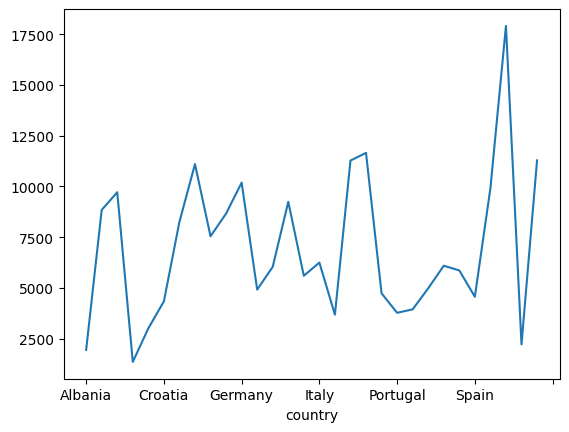

In [22]:
df["gdpPercap_1957"].plot();

In [23]:
type(df["gdpPercap_1957"].values)

numpy.ndarray

In [24]:
type(np.array(df["gdpPercap_1957"]))

numpy.ndarray

In [25]:
type(list(df["gdpPercap_1957"]))

list

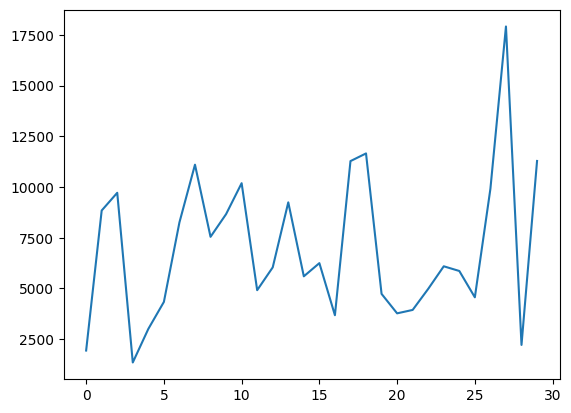

In [26]:
plt.plot(df["gdpPercap_1957"].values);

In [27]:
# select column
df["gdpPercap_1952"].head()

country
Albania                   1601.056136
Austria                   6137.076492
Belgium                   8343.105127
Bosnia and Herzegovina     973.533195
Bulgaria                  2444.286648
Name: gdpPercap_1952, dtype: float64

In [28]:
# select row
df.loc["Albania"].head()

gdpPercap_1952    1601.056136
gdpPercap_1957    1942.284244
gdpPercap_1962    2312.888958
gdpPercap_1967    2760.196931
gdpPercap_1972    3313.422188
Name: Albania, dtype: float64

In [29]:
type(df.loc["Albania"])

pandas.core.series.Series

In [30]:
df.iloc[0].head()

gdpPercap_1952    1601.056136
gdpPercap_1957    1942.284244
gdpPercap_1962    2312.888958
gdpPercap_1967    2760.196931
gdpPercap_1972    3313.422188
Name: Albania, dtype: float64

In [31]:
df.head(2)

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Albania,1601.056136,1942.284244,2312.888958,2760.196931,3313.422188,3533.00391,3630.880722,3738.932735,2497.437901,3193.054604,4604.211737,5937.029526
Austria,6137.076492,8842.598030,10750.721110,12834.602400,16661.625600,19749.42230,21597.083620,23687.826070,27042.018680,29095.920660,32417.607690,36126.492700


In [32]:
df.query("8_000 < gdpPercap_1952 < 10_000")

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Belgium,8343.105127,9714.960623,10991.20676,13149.04119,16672.14356,19117.97448,20979.84589,22525.56308,25575.57069,27561.19663,30485.88375,33692.60508
Denmark,9692.385245,11099.659350,13583.31351,15937.21123,18866.20721,20422.90150,21688.04048,25116.17581,26406.73985,29804.34567,32166.50006,35278.41874
Netherlands,8941.571858,11276.193440,12790.84956,15363.25136,18794.74567,21209.05920,21399.46046,23651.32361,26790.94961,30246.13063,33724.75778,36797.93332
Sweden,8527.844662,9911.878226,12329.44192,15258.29697,17832.02464,18855.72521,20667.38125,23586.92927,23880.01683,25266.59499,29341.63093,33859.74835
United Kingdom,9979.508487,11283.177950,12477.17707,14142.85089,15895.11641,17428.74846,18232.42452,21664.78767,22705.09254,26074.53136,29478.99919,33203.26128


In [33]:
list(df.query("8_000 < gdpPercap_1952 < 10_000").index.values)

['Belgium', 'Denmark', 'Netherlands', 'Sweden', 'United Kingdom']

In [34]:
my_series = df["gdpPercap_1952"]
my_series.head()

country
Albania                   1601.056136
Austria                   6137.076492
Belgium                   8343.105127
Bosnia and Herzegovina     973.533195
Bulgaria                  2444.286648
Name: gdpPercap_1952, dtype: float64

In [35]:
mask = my_series > 10_000
mask

country
Albania                   False
Austria                   False
Belgium                   False
Bosnia and Herzegovina    False
Bulgaria                  False
Croatia                   False
Czech Republic            False
Denmark                   False
Finland                   False
France                    False
Germany                   False
Greece                    False
Hungary                   False
Iceland                   False
Ireland                   False
Italy                     False
Montenegro                False
Netherlands               False
Norway                     True
Poland                    False
Portugal                  False
Romania                   False
Serbia                    False
Slovak Republic           False
Slovenia                  False
Spain                     False
Sweden                    False
Switzerland                True
Turkey                    False
United Kingdom            False
Name: gdpPercap_1952, dtype: boo

In [36]:
my_series[mask]

country
Norway         10095.42172
Switzerland    14734.23275
Name: gdpPercap_1952, dtype: float64

In [37]:
df.query("10_000 < gdpPercap_1952 or 10_000 < gdpPercap_1957")

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Denmark,9692.385245,11099.65935,13583.31351,15937.21123,18866.20721,20422.90150,21688.04048,25116.17581,26406.73985,29804.34567,32166.50006,35278.41874
Germany,7144.114393,10187.82665,12902.46291,14745.62561,18016.18027,20512.92123,22031.53274,24639.18566,26505.30317,27788.88416,30035.80198,32170.37442
Netherlands,8941.571858,11276.19344,12790.84956,15363.25136,18794.74567,21209.05920,21399.46046,23651.32361,26790.94961,30246.13063,33724.75778,36797.93332
Norway,10095.421720,11653.97304,13450.40151,16361.87647,18965.05551,23311.34939,26298.63531,31540.97480,33965.66115,41283.16433,44683.97525,49357.19017
Switzerland,14734.232750,17909.48973,20431.09270,22966.14432,27195.11304,26982.29052,28397.71512,30281.70459,31871.53030,32135.32301,34480.95771,37506.41907
United Kingdom,9979.508487,11283.17795,12477.17707,14142.85089,15895.11641,17428.74846,18232.42452,21664.78767,22705.09254,26074.53136,29478.99919,33203.26128


In [38]:
x = 12_000
df.query(f"{x} < gdpPercap_1952 or {x} < gdpPercap_1957")

,gdpPercap_1952,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967,gdpPercap_1972,gdpPercap_1977,gdpPercap_1982,gdpPercap_1987,gdpPercap_1992,gdpPercap_1997,gdpPercap_2002,gdpPercap_2007
country,,,,,,,,,,,,
Switzerland,14734.23275,17909.48973,20431.0927,22966.14432,27195.11304,26982.29052,28397.71512,30281.70459,31871.5303,32135.32301,34480.95771,37506.41907


In [39]:
print(my_series.quantile())

5142.469716


In [40]:
df.loc["Switzerland", "gdpPercap_1957"]

np.float64(17909.48973)

In [41]:
df.loc[:, "gdpPercap_1957":"gdpPercap_1967"]

,gdpPercap_1957,gdpPercap_1962,gdpPercap_1967
country,,,
Albania,1942.284244,2312.888958,2760.196931
Austria,8842.598030,10750.721110,12834.602400
Belgium,9714.960623,10991.206760,13149.041190
Bosnia and Herzegovina,1353.989176,1709.683679,2172.352423
Bulgaria,3008.670727,4254.337839,5577.002800
Croatia,4338.231617,5477.890018,6960.297861
Czech Republic,8256.343918,10136.867130,11399.444890
Denmark,11099.659350,13583.313510,15937.211230
Finland,7545.415386,9371.842561,10921.636260


In [42]:
df[["gdpPercap_1957", "gdpPercap_1962"]]

,gdpPercap_1957,gdpPercap_1962
country,,
Albania,1942.284244,2312.888958
Austria,8842.598030,10750.721110
Belgium,9714.960623,10991.206760
Bosnia and Herzegovina,1353.989176,1709.683679
Bulgaria,3008.670727,4254.337839
Croatia,4338.231617,5477.890018
Czech Republic,8256.343918,10136.867130
Denmark,11099.659350,13583.313510
Finland,7545.415386,9371.842561


In [43]:
# cf Lab 2
url = "https://archive.ics.uci.edu/ml/machine-learning-databases/00235/"
filename = "household_power_consumption"
zipfilename = filename + ".zip"
location = url + zipfilename

if not path.isfile(zipfilename):
    urllib.request.urlretrieve(location, zipfilename)

zipfile.ZipFile(zipfilename).extractall()

na_values = ["?", ""]
fields = ["Date", "Time", "Global_active_power"]
df = pd.read_csv(
    filename + ".txt", sep=";", nrows=200_000, na_values=na_values, usecols=fields
)

In [44]:
df_load = df.copy()

In [45]:
df.head()

,Date,Time,Global_active_power
0,16/12/2006,17:24:00,4.216
1,16/12/2006,17:25:00,5.360
2,16/12/2006,17:26:00,5.374
3,16/12/2006,17:27:00,5.388
4,16/12/2006,17:28:00,3.666


In [46]:
df.set_index("Date")

,Time,Global_active_power
Date,,
16/12/2006,17:24:00,4.216
16/12/2006,17:25:00,5.360
16/12/2006,17:26:00,5.374
16/12/2006,17:27:00,5.388
16/12/2006,17:28:00,3.666
...,...,...
4/5/2007,14:39:00,0.348
4/5/2007,14:40:00,0.344
4/5/2007,14:41:00,0.342


In [47]:
df.head()

,Date,Time,Global_active_power
0,16/12/2006,17:24:00,4.216
1,16/12/2006,17:25:00,5.360
2,16/12/2006,17:26:00,5.374
3,16/12/2006,17:27:00,5.388
4,16/12/2006,17:28:00,3.666


In [48]:
df_archive = df.copy()
df_archive.head()

,Date,Time,Global_active_power
0,16/12/2006,17:24:00,4.216
1,16/12/2006,17:25:00,5.360
2,16/12/2006,17:26:00,5.374
3,16/12/2006,17:27:00,5.388
4,16/12/2006,17:28:00,3.666


In [49]:
df = df_archive.copy()
df = df.set_index("Date")
df.head()

,Time,Global_active_power
Date,,
16/12/2006,17:24:00,4.216
16/12/2006,17:25:00,5.360
16/12/2006,17:26:00,5.374
16/12/2006,17:27:00,5.388
16/12/2006,17:28:00,3.666


In [50]:
df = df_archive.copy()
df.set_index("Date", inplace=True)
df.head()

,Time,Global_active_power
Date,,
16/12/2006,17:24:00,4.216
16/12/2006,17:25:00,5.360
16/12/2006,17:26:00,5.374
16/12/2006,17:27:00,5.388
16/12/2006,17:28:00,3.666


In [51]:
df["Date"]  # no longer exists as a column

KeyError: 'Date'

In [ ]:
df = df_archive.copy()
df

In [ ]:
df.columns.tolist()

In [52]:
d_replace = {
    "Date": "date",
    "Time": "time",
    "Global_active_power": "global_active_power",
}
df.rename(columns=d_replace)

,time,global_active_power
Date,,
16/12/2006,17:24:00,4.216
16/12/2006,17:25:00,5.360
16/12/2006,17:26:00,5.374
16/12/2006,17:27:00,5.388
16/12/2006,17:28:00,3.666
...,...,...
4/5/2007,14:39:00,0.348
4/5/2007,14:40:00,0.344
4/5/2007,14:41:00,0.342


In [53]:
d_replace = dict()
for old_col in df.columns.tolist():
    d_replace[old_col] = old_col.lower()
print(d_replace)
df = df.rename(columns=d_replace)

{'Time': 'time', 'Global_active_power': 'global_active_power'}


In [54]:
pd.Series(df.columns.tolist()).str.capitalize()

0                   Time
1    Global_active_power
dtype: object

In [55]:
df = df_archive.copy()
df

,Date,Time,Global_active_power
0,16/12/2006,17:24:00,4.216
1,16/12/2006,17:25:00,5.360
2,16/12/2006,17:26:00,5.374
3,16/12/2006,17:27:00,5.388
4,16/12/2006,17:28:00,3.666
...,...,...,...
199995,4/5/2007,14:39:00,0.348
199996,4/5/2007,14:40:00,0.344
199997,4/5/2007,14:41:00,0.342
199998,4/5/2007,14:42:00,0.340


In [56]:
# can chain methods, but do not use `inplace=True`
df = df.rename(columns=d_replace).set_index("date")
df

KeyError: "None of ['date'] are in the columns"

Why you should not use `inplace=True` when chaining

In [57]:
output = df.rename(columns=d_replace, inplace=True)
output

In [58]:
type(output)

NoneType

TODO: drop duplicates, drop nan

# `matplotlib`

In [59]:
time = np.random.randn(10)
position = np.random.randn(10)

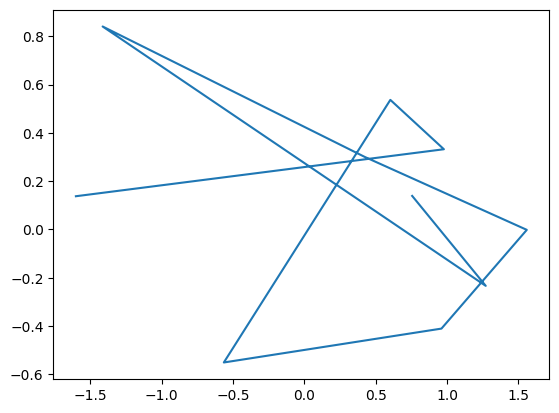

In [60]:
plt.plot(time, position)

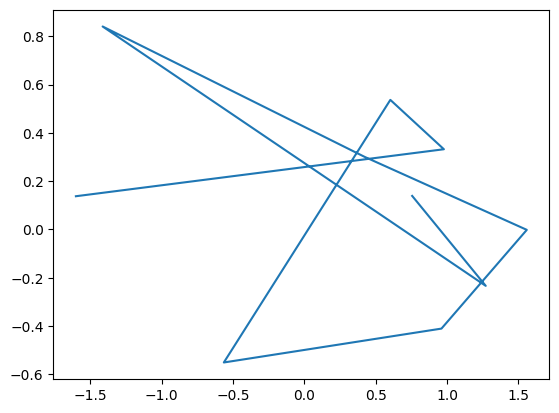

In [61]:
output = plt.plot(time, position)

In [62]:
output

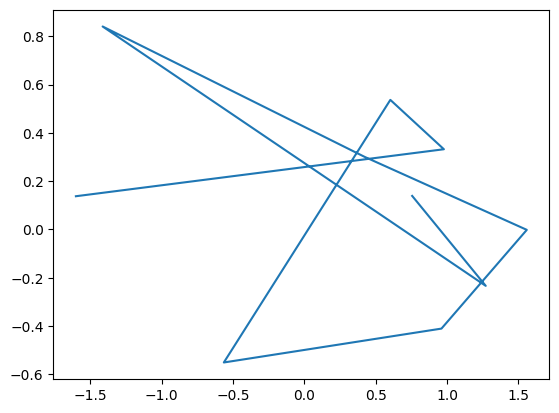

In [63]:
plt.plot(time, position);

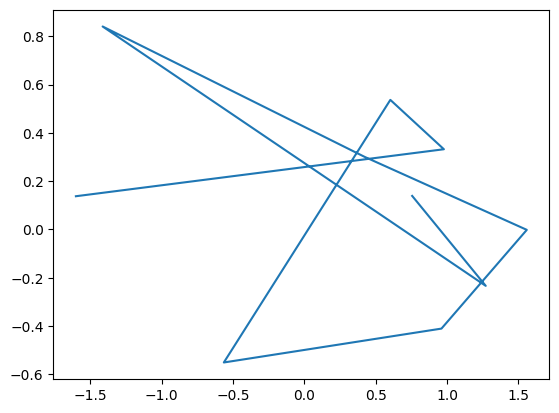

In [64]:
plt.plot(time, position)
plt.show()

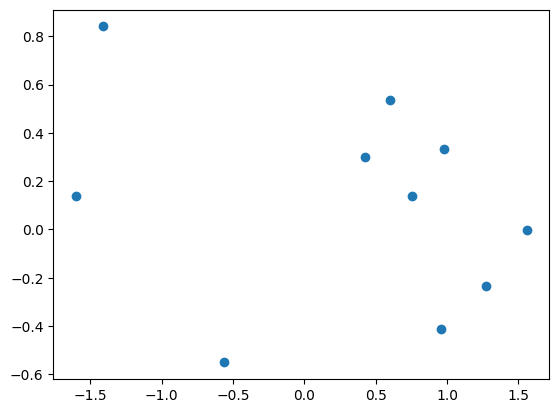

In [65]:
plt.plot(time, position, "o");

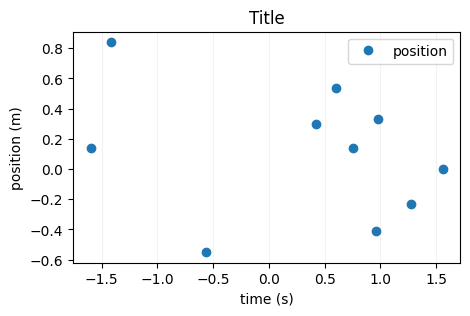

In [66]:
plt.figure(figsize=(5, 3))
plt.plot(time, position, "o")
plt.xlabel("time (s)")
plt.ylabel("position (m)")
plt.legend(["position"])
plt.title("Title")
plt.grid(axis="x", color="0.95")
plt.show()

In [67]:
# Apply the default theme
sns.set_theme()

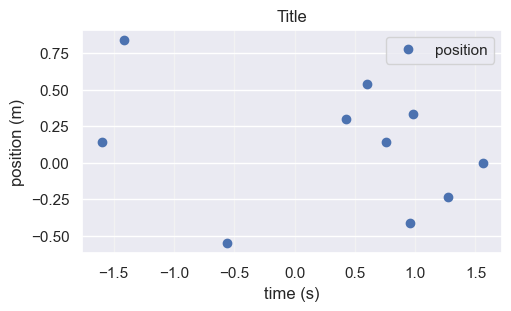

In [68]:
sns.set_style("darkgrid")
# sns.set_style("white")
plt.figure(figsize=(5, 3), layout="constrained")
plt.plot(time, position, "o")
plt.xlabel("time (s)")
plt.ylabel("position (m)")
plt.legend(["position"])
plt.title("Title")
plt.grid(axis="x", color="0.95")
plt.show()

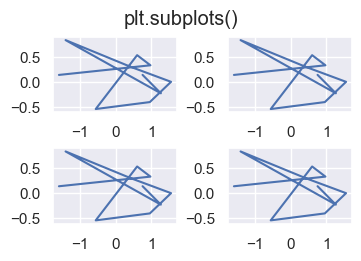

In [69]:
fig, axs = plt.subplots(ncols=2, nrows=2, figsize=(3.5, 2.5), layout="constrained")
# for each Axes, add an artist, in this case a nice label in the middle...
for row in range(2):
    for col in range(2):
        axs[row, col].plot(time, position)
fig.suptitle("plt.subplots()");

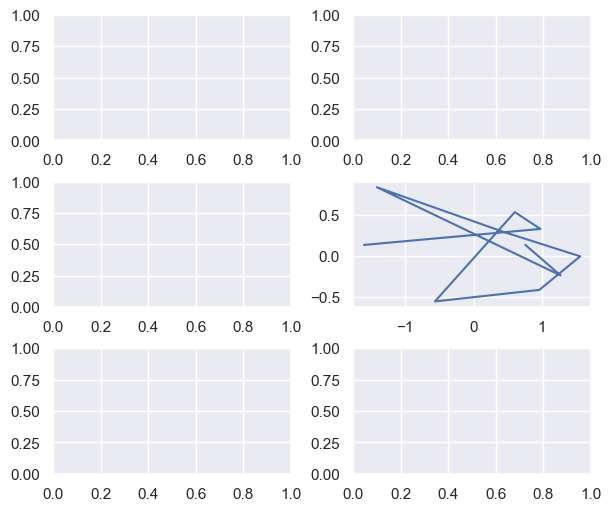

In [70]:
fig, axs = plt.subplots(ncols=2, nrows=3, figsize=(6, 5), layout="constrained")
axs[1, 1].plot(time, position)
# plt.savefig("my_plot.png")
plt.savefig("my_plot.pdf")

In [71]:
!pwd

/Users/sylvaincom/Documents/GitHub/pyds_lectures/cs_exed/ms_ia_confiance/2024_2025/lectures


In [72]:
df.head()

,Date,time,global_active_power
0,16/12/2006,17:24:00,4.216
1,16/12/2006,17:25:00,5.360
2,16/12/2006,17:26:00,5.374
3,16/12/2006,17:27:00,5.388
4,16/12/2006,17:28:00,3.666


# `plotly`

In [73]:
df = px.data.iris()  # plotly contains small datasets

fig = px.scatter(df, x="sepal_width", y="sepal_length", color="species")
fig.show()

In [74]:
df = px.data.tips()
fig = px.bar(df, x="sex", y="total_bill", color="smoker", barmode="group")
fig.show()